# Homework 03

## Exersice 16

### Solution:




Since $X$ is a Poisson random variable with mean $\mu$, thus

$$
P[X=r]=\frac{e^{- \mu}\mu^r}{r!}
$$

Let $Y=a$ be the number of grammatical errors on a page, $Z=b$ be the number of spelling errors on a page.
* Given $X=r$, $Y$ is a Binomial random variable with parameter $Y$~$B(r,p)$
* Given $X=r$, $Z$ is a Binomial random variable with parameter $Z$~$B(r,1-p)$

Use Law of total probability,

$$
\begin{align}
P[Y=a] &= \sum_{r=0}^{\infty}P[Y=a|X=r]P[X=r] \\
       &= \sum_{r=a}^{\infty}{r \choose a}p^a(1-p)^{r-a} \frac{e^{- \mu}\mu^r}{r!} \\
       &= \sum_{r=a}^{\infty} \frac{r!}{a!(r-a)!}  p^a(1-p)^{r-a} \frac{e^{- \mu}\mu^r}{r!} \\
       &= \frac{(\mu p)^a e^{- \mu}}{a!} \sum_{r=a}^{\infty} \frac{(1-p)^{r-a} \mu^{r-a}}{(r-a)!} \\
       &= \frac{(\mu p)^a e^{- \mu}}{a!} e^{(1-p)\mu} \\
       &= \frac{e^{-\mu p}(\mu p)^a}{a!}               
\end{align}
$$

Thus, $Y$ are Poisson random variables with mean $\mu p$. Similarly, 

$$
\begin{align}
P[Z=b] &= \sum_{r=0}^{\infty}P[Z=b|X=r]P[X=r] \\
       &= \sum_{r=b}^{\infty}{r \choose b}(1-p)^b p^{r-b} \frac{e^{- \mu}\mu^r}{r!} \\
       &= \sum_{r=b}^{\infty} \frac{r!}{b!(r-b)!}  (1-p)^b p^{r-b} \frac{e^{- \mu}\mu^r}{r!} \\
       &= \frac{(\mu(1-p))^b e^{-\mu}}{b!} \sum_{r=b}^{\infty} \frac{p^{r-b} \mu^{r-b}}{(r-b)!} \\
       &= \frac{(\mu(1-p))^b e^{-\mu}}{b!} e^{\mu p} \\
       &= \frac{e^{-\mu(1-p)}(\mu(1-p))^b}{b!} \\        
\end{align}
$$

Thus, $Z$ are Poisson random variables with mean $\mu(1-p)$.

Suppose there are $X=r$ errors in one page, and $Y=a$ errors are grammatical errors, $Z=b$ errors are spellling errors.
first We have the equation:$r=a+b$.

$$
\begin{align}
P[Y=a,Z=b] &= P[Y=a,Y+Z=a+b] \\
           &= P[Y=a,X=r] \\
           &= P[Y=a|X=r]P[X=r] \\
           &= {r \choose a} p^a (1-p)^{r-a} \frac{e^{- \mu}\mu^r}{r!}
\end{align}
$$

$$
\begin{align}
P[Y=a]P[Z=b] &= \frac{e^{-\mu p}(\mu p)^a}{a!} \frac{e^{-\mu(1-p)}(\mu(1-p))^b}{b!} \\
             &= \frac{e^{-\mu p}(\mu p)^a}{a!} \frac{e^{-\mu(1-p)}(\mu(1-p))^{r-a}}{(r-a)!} \\
             &= \frac{r!}{a!(r-a)!}  p^a(1-p)^{r-a} \frac{e^{- \mu}\mu^r}{r!} \\
             &= {r \choose a} p^a (1-p)^{r-a} \frac{e^{- \mu}\mu^r}{r!}
           
\end{align}
$$

So, we have the conclusion $P[Y=a,Z=b]= P[Y=a]P[Z=b]$, thus $Y$ and $Z$ are independent.


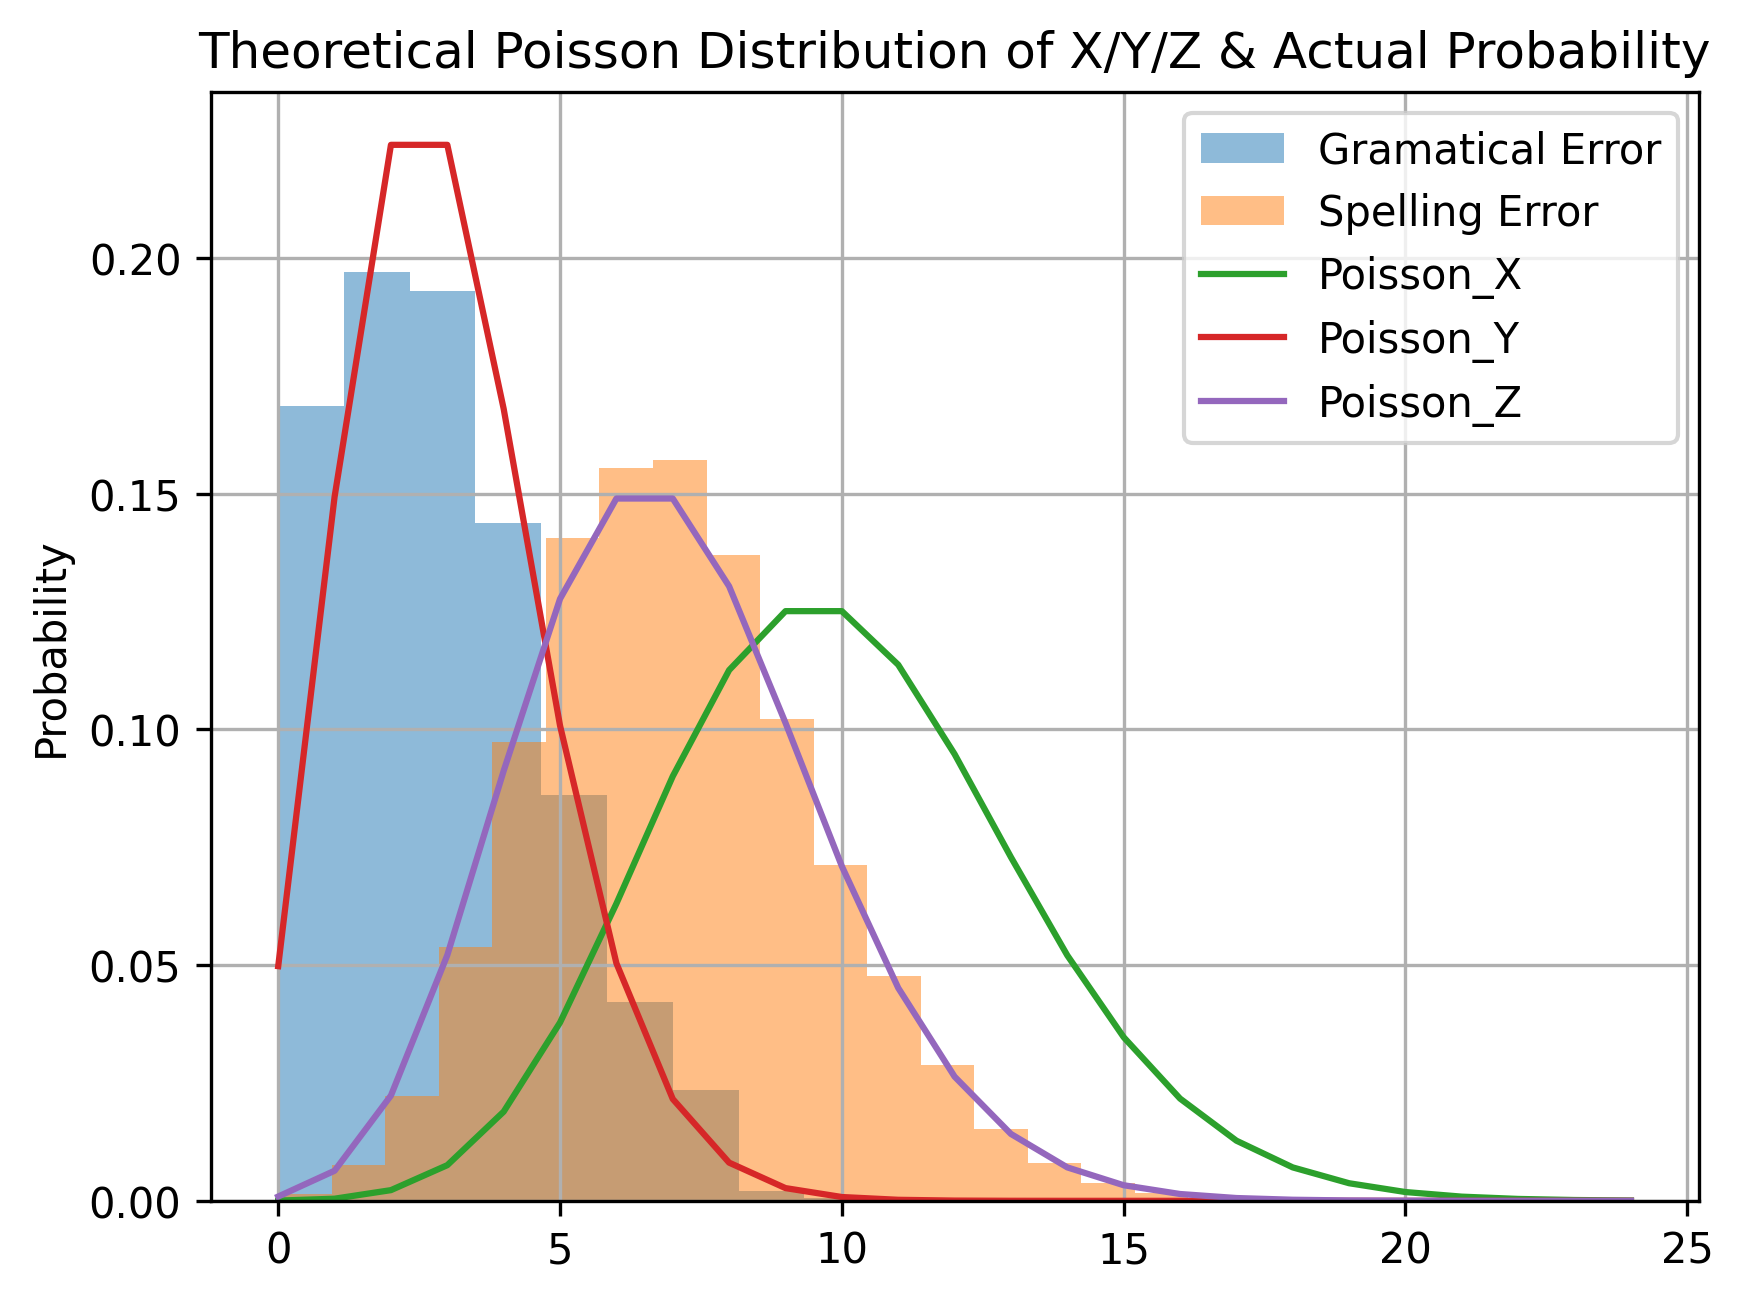

In [1]:
import numpy as np
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

mu = 10.
p = 0.3
instances = 10000

r = np.random.poisson(lam = mu,size=instances)
Y = np.zeros(instances)
Z = np.zeros(instances)

for i in range(instances):
    # print(r[i])
    Y_a = np.random.binomial(r[i], p, size=None)
    Z_b = np.random.binomial(r[i],1-p,size=None)
    Y[i] = Y_a
    Z[i] = Z_b

fig,ax = plt.subplots()
plt.hist(Y, density=True, bins=12, alpha=0.5, label="Gramatical Error")
plt.hist(Z, density=True, bins=20, alpha=0.5, label="Spelling Error")

r = np.arange(0,25)
P_poisson_X = poisson.pmf(r, mu)
P_poisson_Y = poisson.pmf(r, mu*p)
P_poisson_Z = poisson.pmf(r, mu*(1-p))
ax.plot(r,P_poisson_X,label='Poisson_X')
ax.plot(r,P_poisson_Y,label='Poisson_Y')
ax.plot(r,P_poisson_Z,label='Poisson_Z')
# ax.set(xlabel='r')
plt.ylabel('Probability')
ax.set_title('Theoretical Poisson Distribution of X/Y/Z & Actual Probability')
ax.legend()
ax.grid()
plt.show()

We can see in the graph above, Actual Probability of Y/Z are close to the theoretical Poisson distribution of Y/Z.

## Exersice  20

### Solution:



The structure of the system can be described as follow:

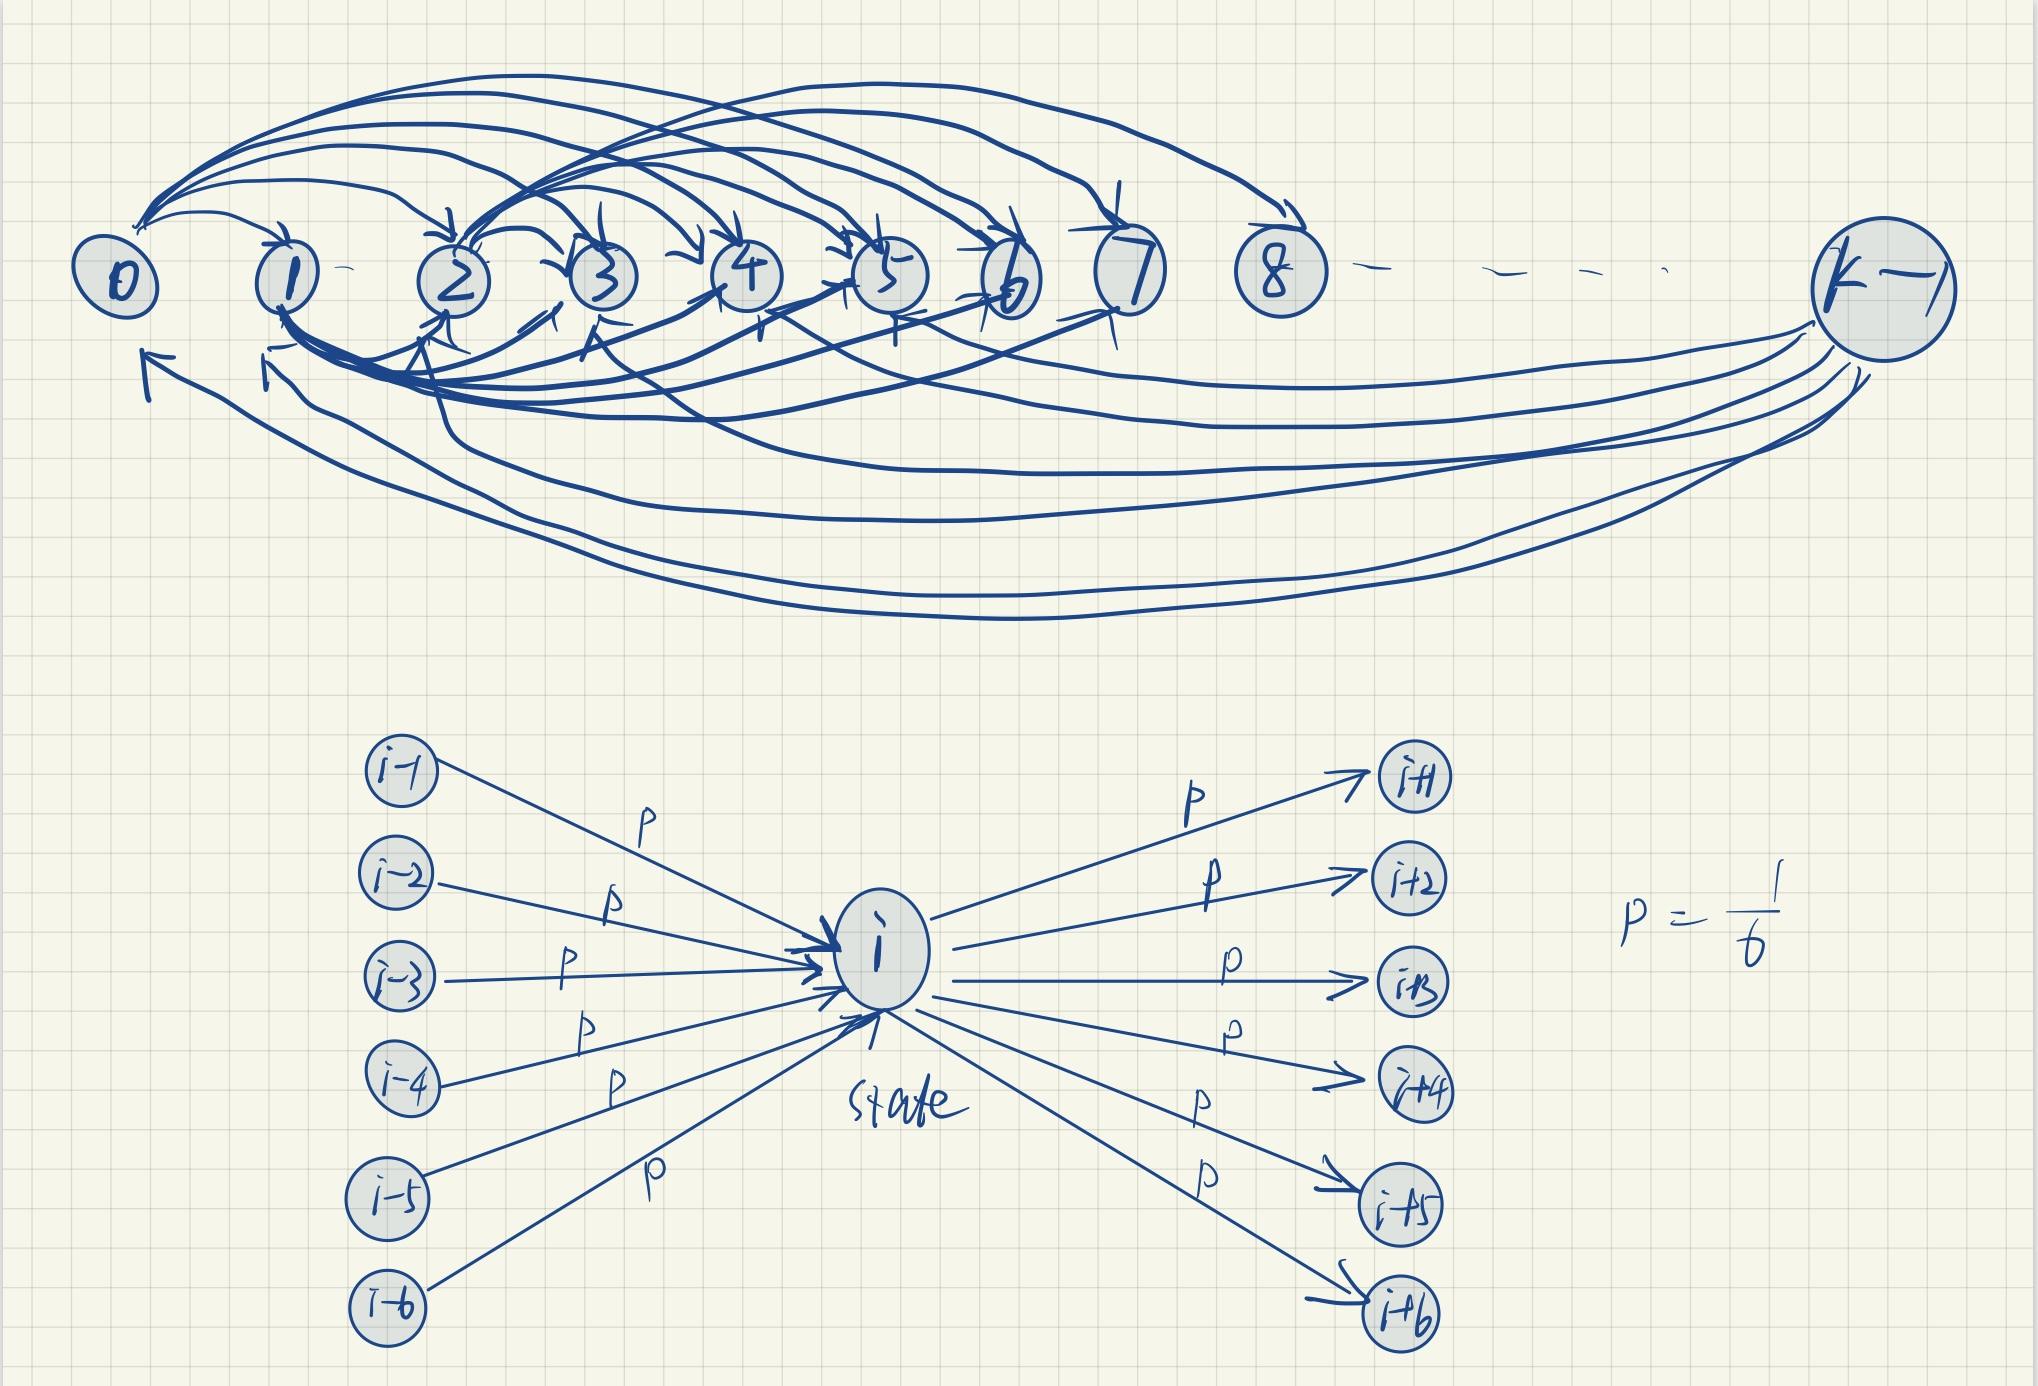

For a finite Markov chain with transition probability vector $\boldsymbol{\pi}$ is ststionary if $\boldsymbol{\pi=\pi*P}$

$\boldsymbol{\pi}=[\pi_0,\pi_1,\pi_2,\pi_3,...,\pi_{k-1}]$

\* suppose K > 6, we have the following equation system ($p=\frac{1}{6}$),

$$
    \left\{ \begin{matrix}
        \pi_0 &=& p \pi_{k-1} + p \pi_{k-2} + p \pi_{k-3} + p \pi_{k-4} + p \pi_{k-5} + p \pi_{k-6} \\
        \pi_1 &=& p \pi_{0} + p \pi_{k-1} + p \pi_{k-2} + p \pi_{k-3} + p \pi_{k-4} + p \pi_{k-5} \\
        \pi_2 &=& p \pi_{1} + p \pi_{0} + p \pi_{k-1} + p \pi_{k-2} + p \pi_{k-3} + p \pi_{k-4} \\
        . \\
        . \\
        . \\
        \pi_{k-1} &=& p \pi_{k-2} + p \pi_{k-3} + p \pi_{k-4} + p \pi_{k-5} + p \pi_{k-6} + p \pi_{k-7} \\
    \end{matrix} \right. 
$$

When $\pi_0=\pi_1=\pi_2=...=\pi_{k-1}=\frac{1}{K}$, the equation holds.
so $\boldsymbol{\pi} = [\frac{1}{K},\frac{1}{K},\frac{1}{K},...,\frac{1}{K}]$

\* when $K \le 6$, for example $K=2$,

$\boldsymbol{\pi} = [\frac{1}{2},\frac{1}{2}]$

$P$ is
$$
 \left[
 \begin{matrix}
   0.5 & 0.5 \\
   0.5 & 0.5  
  \end{matrix}
  \right] \tag{3}
$$

$\boldsymbol{\pi=\pi*P}$ the euqation still holds.

We verified that when $1 \le K \le 6$, $\boldsymbol{\pi=\pi*P}$ still holds.

Thus,for $K>0, \boldsymbol{\pi} = [\frac{1}{K},\frac{1}{K},\frac{1}{K},...,\frac{1}{K}]$ is the system's stationary probability vector. 

In [2]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# n_iteration - number of step
@widgets.interact(K=(20,80,5),n_iteration=(500,3000,100),continuous_update=False)

def f(K,n_iteration):
    n_vec = 2*K         # number of initial state probability vector
    n_state = K         # number of state
    # Generate 2*K initial probability vector and normalise the vector
    p_0 = np.random.random(size=(n_vec,n_state))
    p_0 = np.transpose(np.transpose(p_0)/np.sum(p_0,axis=1))
    # check_sum = np.sum(p_0,axis=1)
    # print(check_sum)
    p_n_iteration = np.zeros(shape=p_0.shape)
    p_n_minus_1 = np.zeros(shape=p_0.shape)
    p_n_minus_1 = p_0

    for _ in range(n_iteration):
        for i in range(0,n_state):
            p_n_iteration[:,i] = (p_n_minus_1[:,i-1]+p_n_minus_1[:,i-2]+p_n_minus_1[:,i-3]+p_n_minus_1[:,i-4]+p_n_minus_1[:,i-5]+p_n_minus_1[:,i-6])*(1/6)
        p_n_minus_1 = p_n_iteration
        # normalise p_n_minus_1 to aviod accumulated error of floating numbers in the calculation process.
        p_n_minus_1 = np.transpose(np.transpose(p_n_minus_1)/np.sum(p_n_minus_1,axis=1))

    # print(p_n_iteration)
    # print(len(p_n_iteration))     # should be 2*k
    # print(len(p_n_iteration[1]))  # should be K
    # check_sum = np.sum(p_n_iteration,axis=1)
    # print(check_sum)              # should be [1,1,1,1,...,1]

    fig = plt.figure(figsize=[15,10])
    plt.axhline(y=1/K,linewidth=4, color='r')
    plt.plot(np.transpose(p_n_iteration),'b--')
    plt.xlabel('state $K$')
    plt.ylabel('probability')
    plt.title('state probability vector')
    plt.legend(['stationary probability vector','$\mathbf{p_i}(n_iteration)$'])
    plt.show()


interactive(children=(IntSlider(value=50, description='K', max=80, min=20, step=5), IntSlider(value=1700, desc…

For n_iteration = 1000, 
* when $K \le 40$, the state probability vectors is close to the stationary probability vector $\boldsymbol{\pi} = [\frac{1}{K},\frac{1}{K},\frac{1}{K},...,\frac{1}{K}]$
* when $K > 40$, n_iteration = 1000 is not enough to get close to the stationary probability vector, it needs more steps to get close to $\boldsymbol{\pi} = [\frac{1}{K},\frac{1}{K},\frac{1}{K},...,\frac{1}{K}]$